<center> 
    <b>
        <big>
            Exploratory Data analysis of our data on [inaturalist](http://www.inaturalist.org)
        </big>
    </b>
</center> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import powerlaw

sns.set_context('notebook')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import folium

# Data wrangling

In [2]:
first_dump = pd.read_csv('./inaturalist_dump.csv')
print(first_dump.shape)
first_dump.head(2)

(208, 41)


,id,observed_on_string,observed_on,time_observed_at,time_zone,out_of_range,user_id,user_login,created_at,updated_at,...,iconic_taxon_name,taxon_id,field:how do you rate the level of hygiene of the market place,field:what is the common name of the product in english,"field:what is the geographical origin of the product: local, national or international",field:what is the local name of the product,field:what is the name of the food market you are visiting,field:what is the nutritional value and/or health benefits (health claims) of the product,field:what is the price of the product,field:what is the scientific name of the product
0,56961,"March 01, 2012 14:15",2012-03-01,2012-03-01 14:15:00 -0500,Eastern Time (US & Canada),False,1000,muir,2012-03-10 19:04:00 -0500,2016-12-19 12:58:08 -0500,...,Mammalia,44181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56964,"March 01, 2012 14:14",2012-03-01,2012-03-01 14:14:00 -0500,Eastern Time (US & Canada),False,1000,muir,2012-03-10 19:04:01 -0500,2016-12-19 12:56:46 -0500,...,Mammalia,43485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# first_dump.scientific_name.unique()

In [50]:
first_dump.notnull().sum()

id                                                                                           208
observed_on_string                                                                           179
observed_on                                                                                  178
time_observed_at                                                                              16
time_zone                                                                                    208
out_of_range                                                                                  14
user_id                                                                                      208
user_login                                                                                   208
created_at                                                                                   208
updated_at                                                                                   208
quality_grade                 

In [17]:
first_dump.dtypes

id                                                                                             int64
observed_on_string                                                                            object
observed_on                                                                                   object
time_observed_at                                                                              object
time_zone                                                                                     object
out_of_range                                                                                  object
user_id                                                                                        int64
user_login                                                                                    object
created_at                                                                                    object
updated_at                                                                                 

###   json exporting   of useful features 

In [72]:
website_dataset = first_dump[['id','user_login','observed_on',
                              'image_url','latitude',
                             'longitude','common_name']]

website_dataset['market_name'] = np.nan
website_dataset['geographical_origin'] = np.nan
website_dataset['health_facts'] = np.nan
website_dataset['usage'] = np.nan

website_dataset.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,id,user_login,observed_on,image_url,latitude,longitude,common_name,market_name,geographical_origin,health_facts,usage
0,56961,muir,2012-03-01,https://static.inaturalist.org/photos/88639/me...,1.854370,10.052250,African Brush-tailed Porcupine,NaN,NaN,NaN,NaN
1,56964,muir,2012-03-01,https://static.inaturalist.org/photos/88646/me...,1.854370,10.052250,Putty-nosed Monkey,NaN,NaN,NaN,NaN
2,77056,akrohn,2010-10-17,https://static.inaturalist.org/photos/114209/m...,5.769016,-7.179026,Green Bush Viper,NaN,NaN,NaN,NaN
3,456868,tonyg,2013-06-05,https://static.inaturalist.org/photos/576493/m...,16.387541,121.112396,NaN,NaN,NaN,NaN,NaN
4,481944,tonyg,2013-06-21,https://static.inaturalist.org/photos/609362/m...,16.387541,121.112396,Mole Crickets,NaN,NaN,NaN,NaN


In [73]:
pd.DataFrame.to_json(website_dataset.transpose(),'./inaturalist_dump_trial.json')

# Create markets map

(here is the [folium documentation](https://github.com/python-visualization/folium))

[this suggestion](http://stackoverflow.com/questions/29535715/python-with-folium-how-can-i-embed-a-webpage-in-the-popup) is not working -.-

In [16]:
markets_map = folium.Map(location=[0,0], tiles='Stamen Terrain',zoom_start=2)

# folium.ClickForMarker(popup='Waypoint').add_to(markets_map)

for row in first_dump.itertuples():

#     def get_frame(url,width,height):

#     my_html = """ 
#                 <!doctype html>
#             <html>
#                 <iframe src={}""".format(row.image_url + '.html') + """ frameborder="0"></iframe>
            
#             </html>"""

#     popup = get_frame(row.image_url + '.html',100,200)

    #     iframe = folium.element.IFrame(html=row.image_url, width=500, height=300)
#     popup = folium.Popup(html=popup, max_width=2650)
        
    folium.Marker(
        location=[row.latitude, row.longitude],
#         popup=my_html).add_to(markets_map)
        popup=str(row.common_name)).add_to(markets_map)

markets_map.save('markets_map.html')

markets_map

# Descriptive Analysis 

In [70]:
first_dump.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'out_of_range', 'user_id', 'user_login', 'created_at',
       'updated_at', 'quality_grade', 'license', 'url', 'image_url',
       'tag_list', 'description', 'id_please', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'geoprivacy', 'positioning_method',
       'positioning_device', 'species_guess', 'scientific_name', 'common_name',
       'iconic_taxon_name', 'taxon_id',
       'field:how do you rate the level of hygiene of the market place',
       'field:what is the common name of the product in english',
       'field:what is the geographical origin of the product: local, national or international ',
       'field:what is the local name of the product',
       'field:what is the name of the food market you are visiting',
       'field:what is th

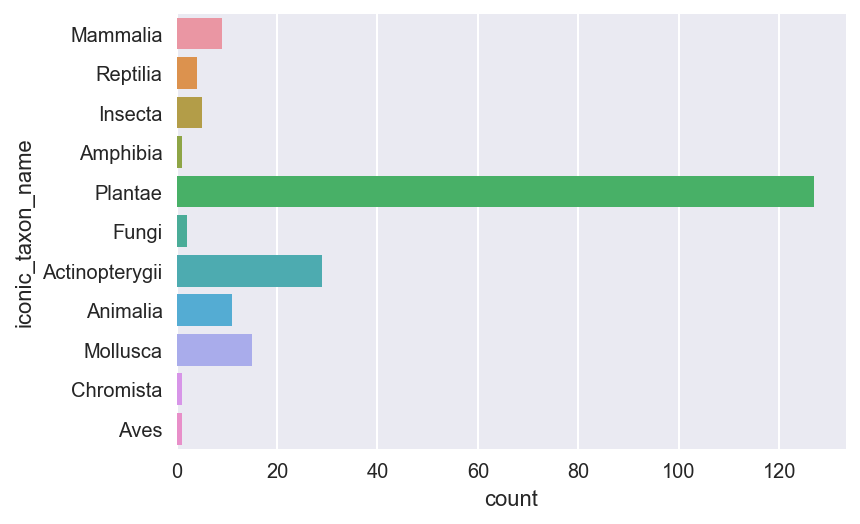

In [89]:
sns.countplot(y=first_dump.iconic_taxon_name);

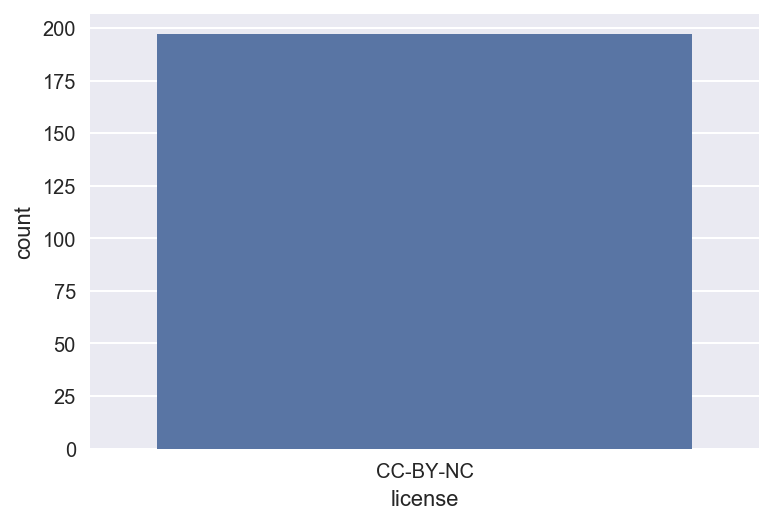

In [85]:
sns.countplot(first_dump.license);

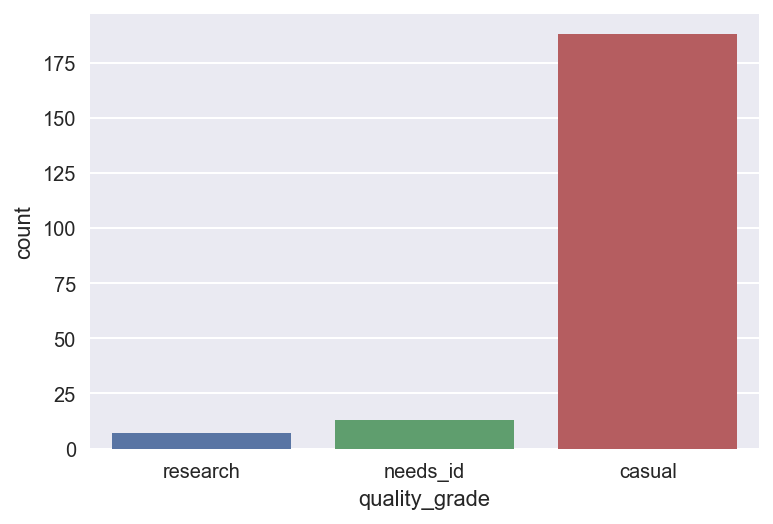

In [80]:
sns.countplot(first_dump.quality_grade);

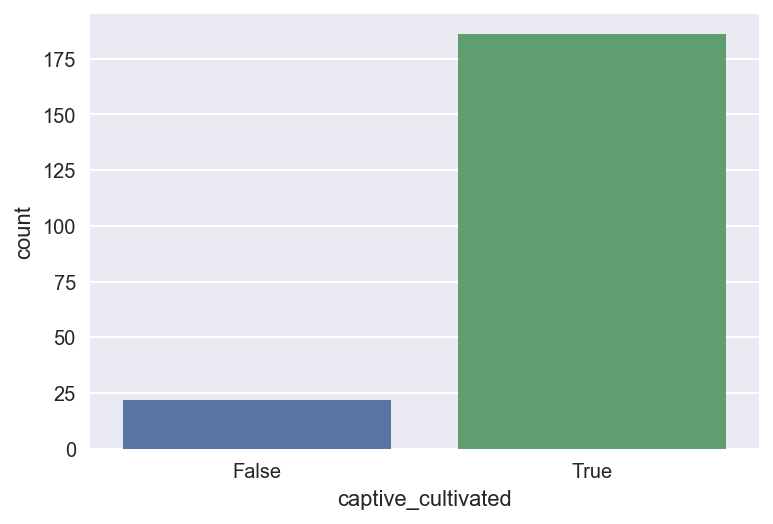

In [79]:
sns.countplot(first_dump.captive_cultivated);

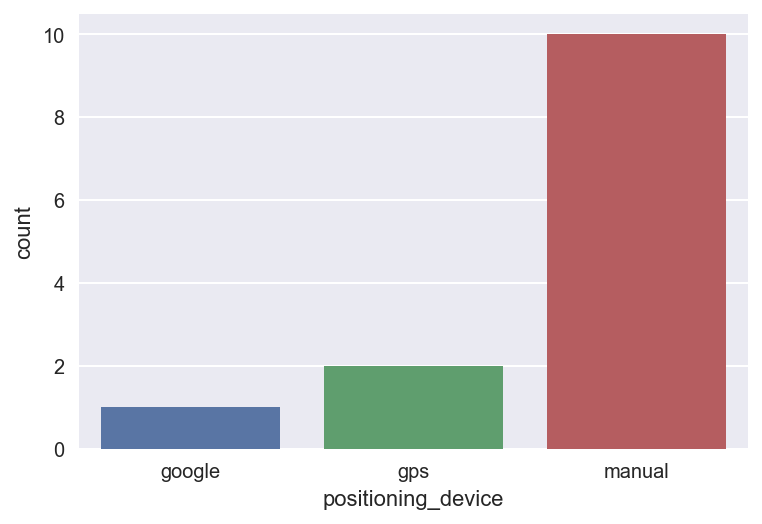

In [77]:
sns.countplot(first_dump.positioning_device);

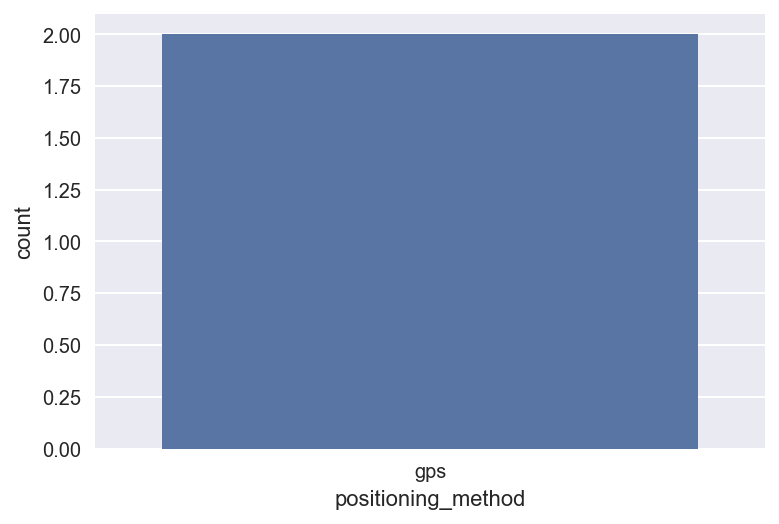

In [78]:
sns.countplot(first_dump.positioning_method);

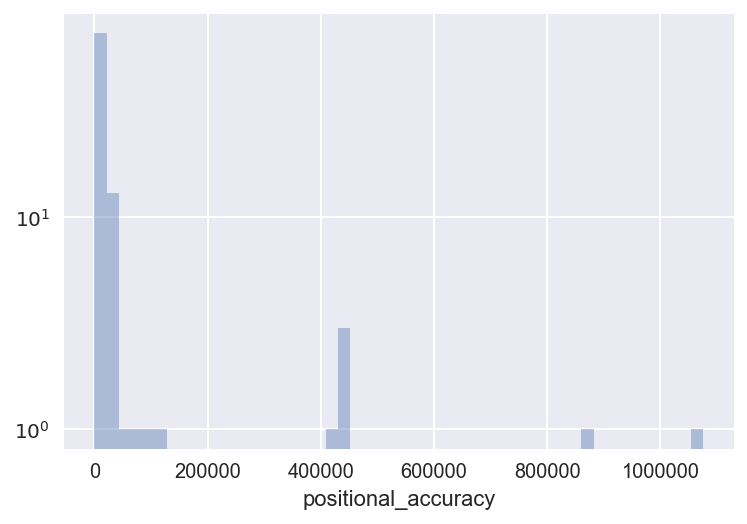

In [94]:
sns.distplot(first_dump.positional_accuracy.dropna(),kde=False)
plt.yscale('log');